## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

def build_mlp(input_shape, out_unit = 10, hidden_unit = [512, 256, 128, 64], drop_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit_num in enumerate(hidden_unit):
        if i == 0:
            x = keras.layers.Dense(units = unit_num, activation = 'relu', 
                                   name = 'hidden_'+str(i+1), kernel_regularizer = l2(1e-4))(input_layer)
            Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units = unit_num, activation = 'relu',
                                   name = 'hidden_'+str(i+1), kernel_regularizer = l2(1e-4))(x)
            Dropout(drop_ratio)(x)
    
    out_layer = keras.layers.Dense(out_unit, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out_layer])
    
    return model

In [10]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 128
DROP_RATIO = [0.1, 0.2, 0.3, 0.4, 0.5]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, ratio in enumerate(DROP_RATIO):
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], drop_ratio = ratio)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    model.fit(x_train, y_train, epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    exp_tag = 'exp_' + str(ratio)
    results[exp_tag] = {
        'train-loss': train_loss,
        'val-loss': val_loss,
        'train_accuracy': train_acc,
        'val_accuracy': val_acc
    }

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 403us/step - loss: 2.0135 - acc: 0.3018 - val_loss: 1.8136 - val_acc: 0.3707
Epoch 2/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.7819 - acc: 0.3800 - val_loss: 1.7185 - val_acc: 0.4028
Epoch 3/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.6849 - acc: 0.4128 - val_loss: 1.6713 - val_acc: 0.4219
Epoch 4/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.6160 - acc: 0.4395 - val_loss: 1.6044 - val_acc: 0.4418
Epoch 5/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.5775 - acc: 0.4517 - val_loss: 1.5790 - val_acc: 0.4506
Epoch 6/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.5355 - acc: 0.4687 - val_loss: 1.5400 - val_acc: 0.4667
Epoch 7/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.5192 - acc: 0.4755 - val_loss: 1.

50000/50000 [==============================] - 18s 367us/step - loss: 1.4835 - acc: 0.4886 - val_loss: 1.5016 - val_acc: 0.4862
Epoch 9/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.4577 - acc: 0.5002 - val_loss: 1.5221 - val_acc: 0.4702
Epoch 10/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.4435 - acc: 0.5030 - val_loss: 1.5050 - val_acc: 0.4901
Epoch 11/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.4205 - acc: 0.5115 - val_loss: 1.4620 - val_acc: 0.4961
Epoch 12/50
50000/50000 [==============================] - 20s 409us/step - loss: 1.3966 - acc: 0.5219 - val_loss: 1.4684 - val_acc: 0.4972
Epoch 13/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.3825 - acc: 0.5293 - val_loss: 1.4943 - val_acc: 0.4868
Epoch 14/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.3689 - acc: 0.5350 - val_loss: 1.4574 - val_acc: 0.5008
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 18s 370us/step - loss: 1.3312 - acc: 0.5505 - val_loss: 1.4861 - val_acc: 0.5022
Epoch 17/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.3240 - acc: 0.5542 - val_loss: 1.4990 - val_acc: 0.4965
Epoch 18/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.3163 - acc: 0.5547 - val_loss: 1.4683 - val_acc: 0.5090
Epoch 19/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.2931 - acc: 0.5684 - val_loss: 1.4962 - val_acc: 0.5102
Epoch 20/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.2797 - acc: 0.5730 - val_loss: 1.4611 - val_acc: 0.5142
Epoch 21/50
50000/50000 [==============================] - 20s 406us/step - loss: 1.2732 - acc: 0.5772 - val_loss: 1.4686 - val_acc: 0.5179
Epoch 22/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.2620 - acc: 0.5805 - val_loss: 1.4599 - val_acc: 0.5230
Epoch 23/50
50000/50000 [=======

50000/50000 [==============================] - 19s 377us/step - loss: 1.2389 - acc: 0.5895 - val_loss: 1.4689 - val_acc: 0.5151
Epoch 25/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.2269 - acc: 0.5944 - val_loss: 1.4647 - val_acc: 0.5209
Epoch 26/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.2157 - acc: 0.5993 - val_loss: 1.4800 - val_acc: 0.5215
Epoch 27/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.1997 - acc: 0.6028 - val_loss: 1.4723 - val_acc: 0.5206
Epoch 28/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.1968 - acc: 0.6069 - val_loss: 1.4905 - val_acc: 0.5216
Epoch 29/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.1965 - acc: 0.6089 - val_loss: 1.5053 - val_acc: 0.5128
Epoch 30/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.1821 - acc: 0.6134 - val_loss: 1.4664 - val_acc: 0.5326
Epoch 31/50
50000/50000 [=======

50000/50000 [==============================] - 18s 364us/step - loss: 1.1996 - acc: 0.6059 - val_loss: 1.4786 - val_acc: 0.5244
Epoch 33/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.2043 - acc: 0.6041 - val_loss: 1.4819 - val_acc: 0.5180
Epoch 34/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.1996 - acc: 0.6054 - val_loss: 1.4675 - val_acc: 0.5214
Epoch 35/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.1831 - acc: 0.6123 - val_loss: 1.5128 - val_acc: 0.5117
Epoch 36/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1735 - acc: 0.6155 - val_loss: 1.4647 - val_acc: 0.5286
Epoch 37/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.1801 - acc: 0.6154 - val_loss: 1.5199 - val_acc: 0.5151
Epoch 38/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1809 - acc: 0.6145 - val_loss: 1.4668 - val_acc: 0.5306
Epoch 39/50
50000/50000 [=======

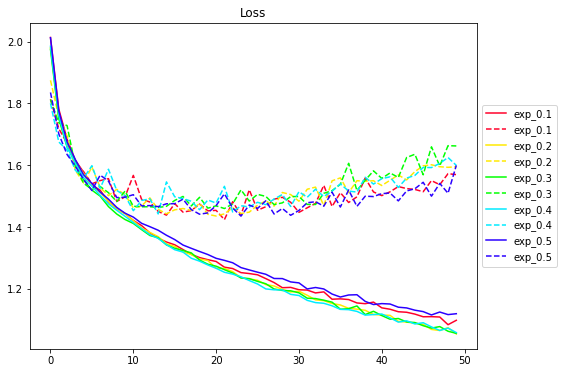

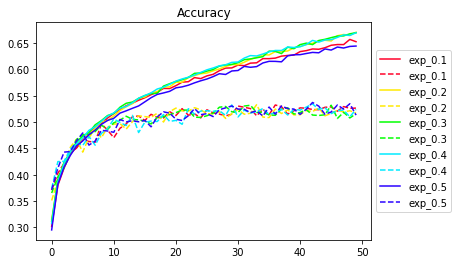

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_num = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_map = [cm(1.*i/color_num) for i in range(color_num)]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label = cond, color = color_map[i])
plt.title('Loss')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_accuracy'])), results[cond]['train_accuracy'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '--', label = cond, color = color_map[i])
plt.title('Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
